# Kickstarter Analysis: What Makes a Winning Project?

## Overview
This notebook analyzes Kickstarter project data to identify factors that contribute to project success. We'll explore patterns in funding goals, project duration, and other key metrics to build predictive models for project outcomes.

## Dataset
- Source: Kickstarter projects dataset
- Time period: [specify the time range]
- Key features: Project goals, duration, categories, countries, and outcomes

##  Outline
1. Data Loading and Initial Exploration
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Modeling
    - 4.1 Baseline Model
    - 4.2 Random Forest Model

## 1. Data Loading and Initial Exploration
We begin by loading the dataset and performing initial checks for data quality, duplicates, and missing values.

In [46]:
# import main libraries
import pandas as pd
import numpy as np

# make pairplots feature vs state
import seaborn as sns
import matplotlib.pyplot as plt

# to evaluate the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import data from csv
df = pd.read_csv('data/kickstarter_projects.csv')

In [47]:
# lets get an first overview of the data
df.head(10)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed


In [48]:
# check number of values in each column
df.nunique()

ID             374853
Name           372061
Category           15
Subcategory       159
Country            22
Launched       374297
Deadline         3164
Goal            27692
Pledged         39989
Backers          3963
State               5
dtype: int64

In [49]:
# are there any duplicates?
df['Name'].duplicated().sum()

2792

In [50]:
#write all duplicates to new dataframe
df_duplicates = df[df['Name'].duplicated(keep=False)]
df_duplicates.head (10)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
524,1896639590,Test (Canceled),Art,Performance Art,United States,2009-09-14 19:37:43,2009-10-14,50,0,0,Canceled
865,2135481078,Canceled (Canceled),Technology,Software,United States,2009-10-25 21:30:47,2009-12-16,2000,0,0,Canceled
982,23113347,Here You Go,Publishing,Publishing,United States,2009-11-10 20:34:29,2009-12-08,2500,3085,96,Successful
1127,488433765,FOUR,Film & Video,Narrative Film,United States,2009-12-01 19:40:40,2010-02-02,18000,19325,181,Successful
1165,210353159,Deleted (Canceled),Photography,Photography,United States,2009-12-07 00:39:05,2010-03-07,5000,0,0,Canceled
1428,77666218,ZERO,Film & Video,Narrative Film,United States,2010-01-12 02:37:42,2010-03-18,5000,155,3,Failed
1715,1617791686,Sympathetic Vibrations,Music,Indie Rock,United States,2010-02-07 01:50:05,2010-04-05,20000,3586,14,Failed
1731,1190237222,Worlds Apart,Journalism,Journalism,United States,2010-02-08 05:03:35,2010-03-03,2000,2325,48,Successful
1818,1976651408,Tent City,Film & Video,Documentary,United States,2010-02-16 00:31:15,2010-05-16,30000,4622,63,Failed
1988,1037569159,Cakestarter,Food,Food,United States,2010-02-27 23:16:22,2010-05-03,7500,7609,163,Successful


In [51]:
# check for missing values
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [52]:
# check the d.types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


## 2. Data Preprocessing
Key preprocessing steps include:
- Sampling 10% of data for initial analysis
- Removing live and suspended projects
- Filtering extreme goal values
- Creating goal amount bins

In [53]:
# i want to take a sample of 10% of the data
df_pre =df.sample(frac=0.1, random_state=1)

df_pre = df_pre.drop(columns= ['ID', 'Pledged', 'Backers'])

df_pre = df_pre.query('State != "Live" and State != "Suspended"')
df_pre

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,State
263367,Desteria - A New Dawn,Games,Video Games,United Kingdom,2015-12-08 14:19:31,2016-02-06,3626,Failed
265424,Two Gun Crowley,Film & Video,Festivals,United States,2015-12-24 22:44:42,2016-01-06,1000000,Failed
366662,FoxTrot subscription box,Crafts,Crafts,United States,2017-10-26 23:30:41,2017-12-05,756,Successful
138087,Wanted Board Game (Canceled),Games,Tabletop Games,Canada,2014-04-15 19:18:17,2014-05-15,27581,Canceled
142558,Glitter Coated Dog.,Film & Video,Experimental,United Kingdom,2014-05-15 09:37:08,2014-06-14,1704,Failed
...,...,...,...,...,...,...,...,...
73979,"Delicious Habanero Chocolates, made by Cioccol...",Food,Food,United States,2012-11-02 02:10:46,2012-12-02,3000,Failed
93386,Tessa and Hannah's Gilded Summer Collection,Fashion,Fashion,United States,2013-04-27 05:52:51,2013-05-11,600,Successful
179870,Miserable New York Mets Fan T-Shirt,Fashion,Apparel,United States,2014-10-27 18:57:41,2014-12-16,1500,Failed
74965,The Sun is on Fire,Film & Video,Shorts,United States,2012-11-12 21:50:19,2012-11-27,1500,Successful


## 3. Exploratory Data Analysis (EDA)
Visual analysis of:
- Distribution of project goals
- Success rates by goal amount
- Project outcomes by category and country
- Temporal patterns in project success

array([[<Axes: title={'center': 'Goal'}>]], dtype=object)

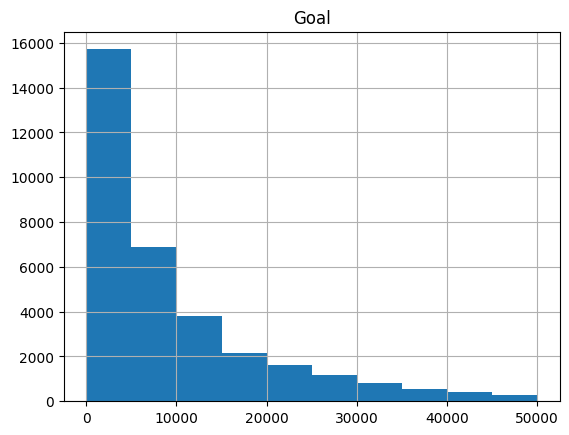

In [54]:
# make a histogram of the goal column and filter Goal < 10000
df_pre = df_pre[df_pre['Goal'] < 2000000]
df_pre[df_pre['Goal'] < 50000].hist()

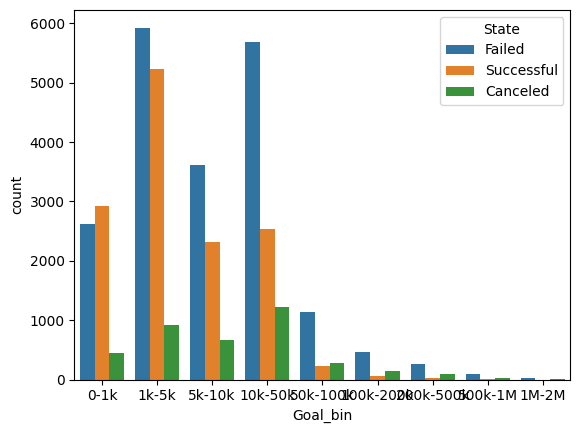

In [55]:
# bar plot of successful projects by goal amount do binning of goal amount
df_pre = df_pre.copy()
df_pre['Goal_bin'] = pd.cut(df_pre['Goal'], bins=[0, 1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000, 2000000], labels=['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-2M'])

# make a bar plot of the number of successful projects by goal amount
sns.countplot(x='Goal_bin', data=df_pre, hue='State')
plt.show()

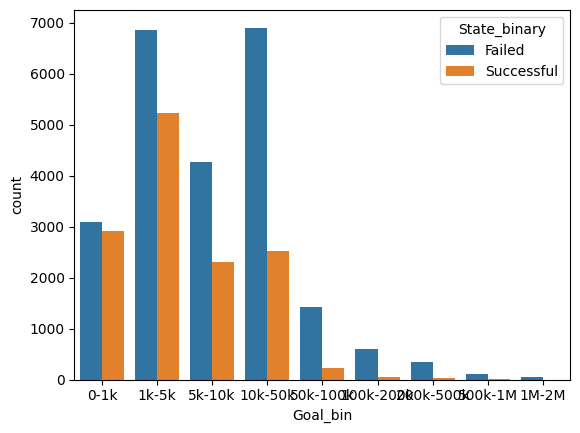

In [56]:
# I want to add the count of the canceld projects to the failed projects make a bar plot of the number of successful projects by goal amount
df_pre.loc[:, 'State_binary'] = df_pre['State'].replace({'Canceled': 'Failed'})
sns.countplot(x='Goal_bin', data=df_pre, hue='State_binary')
plt.show()

In [57]:
# I want to also filter canceled projects
df_pre = df_pre.query('State != "Canceled"')

# I want to save the count to a new dataframe
df_count = df_pre.groupby(['Goal_bin', 'State']).size().reset_index(name='count')
df_count

,Goal_bin,State,count
0,0-1k,Failed,2626
1,0-1k,Successful,2923
2,1k-5k,Failed,5928
3,1k-5k,Successful,5224
4,5k-10k,Failed,3607
5,5k-10k,Successful,2313
6,10k-50k,Failed,5679
7,10k-50k,Successful,2531
8,50k-100k,Failed,1143
9,50k-100k,Successful,226


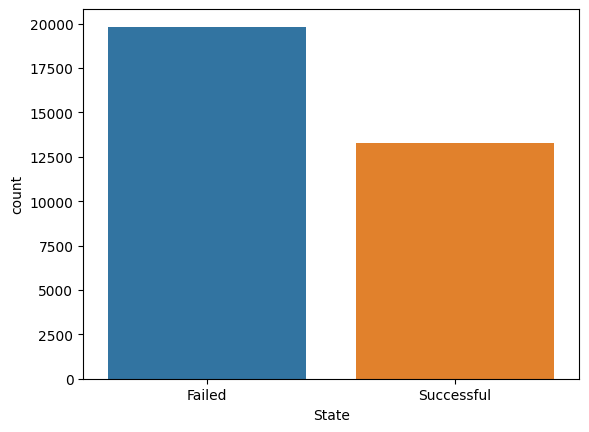

In [59]:
# bar plot of the number of projects by state
sns.countplot(x='State', data=df_pre)
plt.show()

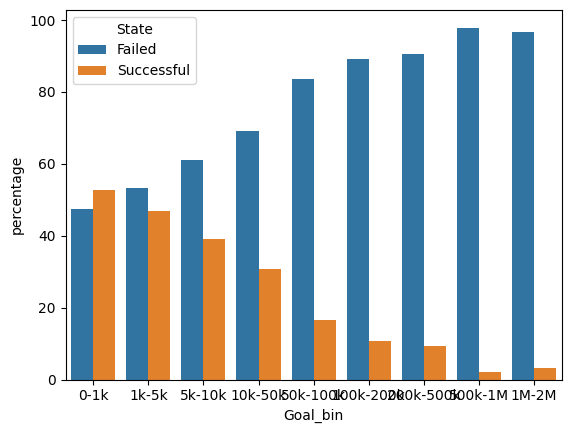

In [61]:
# I want to see the percentage of successful projects by goal amount make an addition of the count of successful and failed projects
df_count['total'] = df_count.groupby('Goal_bin')['count'].transform('sum')

# make a new column with the percentage of successful projects
df_count['percentage'] = df_count['count'] / df_count['total'] * 100

#make a bar plot of the percentage of successful projects by goal amount
sns.barplot(x='Goal_bin', y='percentage', data=df_count, hue='State')
plt.show()

In [ ]:
# Give an overview of the failed and successful data based on goal amount
df_count

,Goal,State,count,total,percentage
0,0,Successful,1,1,100.000000
1,1,Failed,1,24,4.166667
2,1,Successful,23,24,95.833333
3,2,Successful,3,3,100.000000
4,3,Failed,1,3,33.333333
...,...,...,...,...,...
7277,1732450,Failed,1,1,100.000000
7278,1750000,Failed,3,3,100.000000
7279,1795944,Failed,1,1,100.000000
7280,1801048,Failed,1,1,100.000000


## 4. Modeling

## 4.1 Baseline Model
A simple rule-based model using goal amounts to predict success.

In [ ]:
# Manually defined based on your table
bin_success_rate = {
    '0-1k': 52.676158,
    '1k-5k': 46.843615,
    '5k-10k': 39.070946,
    '10k-50k': 30.828258,
    '50k-100k': 16.508400,
    '100k-200k': 10.831721,
    '200k-500k': 9.407666,
    '500k-1M': 2.105263,
    '1M-2M': 3.225806
}

In [ ]:
# Function to convert goal to bin
def goal_to_bin(goal):
    if goal < 1000:
        return '0-1k'
    elif goal < 5000:
        return '1k-5k'
    elif goal < 10000:
        return '5k-10k'
    elif goal < 50000:
        return '10k-50k'
    elif goal < 100000:
        return '50k-100k'
    elif goal < 200000:
        return '100k-200k'
    elif goal < 500000:
        return '200k-500k'
    elif goal < 1_000_000:
        return '500k-1M'
    elif goal < 2_000_000:
        return '1M-2M'
    else:
        return 'over-2M'  # Not in your data — optional fallback

# Function to predict success based on goal
def predict_from_goal(goal, threshold=50):
    goal_bin = goal_to_bin(goal)
    success_rate = bin_success_rate.get(goal_bin, 0)  # fallback to 0%
    return 1 if success_rate > threshold else 0

# Test the function
df_pre

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,State,Goal_bin,State_binary
263367,Desteria - A New Dawn,Games,Video Games,United Kingdom,2015-12-08 14:19:31,2016-02-06,3626,0,1k-5k,Failed
265424,Two Gun Crowley,Film & Video,Festivals,United States,2015-12-24 22:44:42,2016-01-06,1000000,0,500k-1M,Failed
366662,FoxTrot subscription box,Crafts,Crafts,United States,2017-10-26 23:30:41,2017-12-05,756,1,0-1k,Successful
142558,Glitter Coated Dog.,Film & Video,Experimental,United Kingdom,2014-05-15 09:37:08,2014-06-14,1704,0,1k-5k,Failed
173102,Relatively Normal: episode 1,Film & Video,Comedy,United States,2014-09-25 07:01:53,2014-10-10,6000,1,5k-10k,Successful
...,...,...,...,...,...,...,...,...,...,...
73979,"Delicious Habanero Chocolates, made by Cioccol...",Food,Food,United States,2012-11-02 02:10:46,2012-12-02,3000,0,1k-5k,Failed
93386,Tessa and Hannah's Gilded Summer Collection,Fashion,Fashion,United States,2013-04-27 05:52:51,2013-05-11,600,1,0-1k,Successful
179870,Miserable New York Mets Fan T-Shirt,Fashion,Apparel,United States,2014-10-27 18:57:41,2014-12-16,1500,0,1k-5k,Failed
74965,The Sun is on Fire,Film & Video,Shorts,United States,2012-11-12 21:50:19,2012-11-27,1500,1,1k-5k,Successful


In [ ]:
# Ensure 'State' column contains only binary values (1 = success, 0 = fail)
df_pre['State'] = df_pre['State'].replace({'Successful': 1, 'Failed': 0})
df_pre = df_pre[df_pre['State'].isin([0, 1])]

# Assume df_pre has 'Goal' and 'State' with binary values (1 = success, 0 = fail)
X = df_pre[['Goal']]
y = df_pre['State']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict using your rule model
y_pred = X_test['Goal'].apply(predict_from_goal)

# Ensure y_test and y_pred are of the same type
y_test = y_test.astype(int)

# Evaluate
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.90      0.74      3993
           1       0.54      0.18      0.27      2634

    accuracy                           0.61      6627
   macro avg       0.58      0.54      0.50      6627
weighted avg       0.59      0.61      0.55      6627

Accuracy: 0.6132488305417233


              precision    recall  f1-score   support

           0       0.68      0.64      0.66      3993
           1       0.50      0.54      0.52      2634

    accuracy                           0.60      6627
   macro avg       0.59      0.59      0.59      6627
weighted avg       0.61      0.60      0.60      6627

Accuracy: 0.6025350837483024


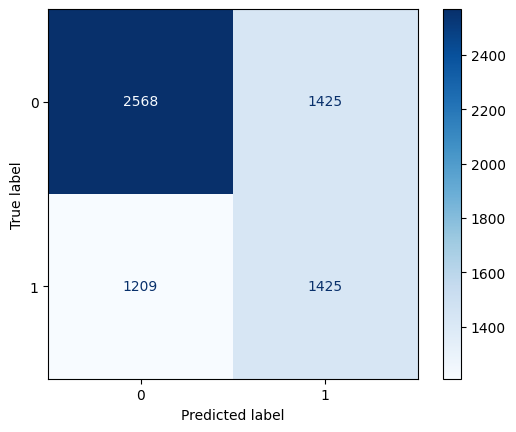

In [ ]:
# Predict using your rule model # optimize threshold to increase true positive rate
y_pred = X_test['Goal'].apply(predict_from_goal, threshold=40)

# Evaluate
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Evaluation:

#### If your goal is to help creators understand their success chance: Metric: Accuracy or F1 Score
*	You care about being right overall, but especially not overpromising success.
*	F1 Score balances precision (don’t say it will succeed when it won’t) and recall (don’t miss good projects).

#### If you want to focus on identifying successful projects (e.g., to promote or fund them): Metric: Precision
*	You want the projects you predict as “successful” to actually succeed.
*	High precision = few false positives (i.e., you’re not giving false hope).

#### If avoiding false positives is more important (e.g., managing risk): Metric: Specificity or False Positive Rate (FPR)
*	You want to minimize bad bets, even at the cost of missing some good ones.


## 4.2 Random Forest Model (ChatGTP)
An advanced machine learning approach incorporating multiple features.

Confusion Matrix:
 [[29416 10093]
 [14123 12661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71     39509
           1       0.56      0.47      0.51     26784

    accuracy                           0.63     66293
   macro avg       0.62      0.61      0.61     66293
weighted avg       0.63      0.63      0.63     66293



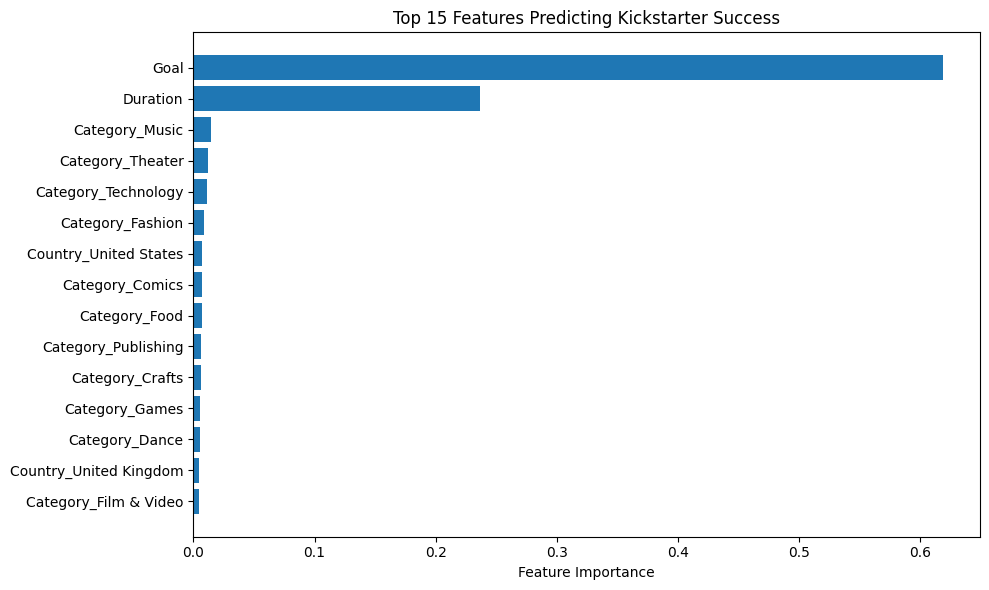

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("data/kickstarter_projects.csv")

# Keep only projects marked as 'Successful' or 'Failed'
df = df[df['State'].isin(['Successful', 'Failed'])].copy()
df['Successful'] = (df['State'] == 'Successful').astype(int)

# Convert date columns
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])
df['Duration'] = (df['Deadline'] - df['Launched']).dt.days

# Keep only relevant features for pre-launch modeling
df = df[['Goal', 'Duration', 'Category', 'Country', 'Successful']]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Country'], drop_first=True)

# Train-test split
X = df_encoded.drop(columns='Successful')
y = df_encoded['Successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot top 15 feature importances
importances = model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features Predicting Kickstarter Success')
plt.tight_layout()
plt.show()

The first try using a random forst offers an improvement, however the improvement is not as large as expected!